# 1. 数据清洗

对每篇新闻做了如下处理: 

- 保留头部中的 `Subject` 和 `Organization` 的内容, 去除其他内容;
- 去除尾部内容
- 在 `fetch_20newsgroups` 时默认去除了引用内容
- 先将原文本数据正则分词, 然后做stemming, 再后合并为句子

总共有 20 类文本数据:
```
comp.graphics
comp.os.ms-windows.misc
comp.sys.ibm.pc.hardware
comp.sys.mac.hardware
comp.windows.x	
rec.autos
rec.motorcycles
rec.sport.baseball
rec.sport.hockey	
sci.crypt
sci.electronics
sci.med
sci.space
misc.forsale	
talk.politics.misc
talk.politics.guns
talk.politics.mideast	
talk.religion.misc
alt.atheism
soc.religion.christian
```

先尝试用所有类别的数据训练模型.

In [1]:
from process import load_data

X_train, y_train, X_test, y_test = load_data()

print('train set: %d' % len(X_train))
print('test set:  %d' % len(X_test))

Loading cleaned data from file...
train set: 11314
test set:  7532


Text(0.5,0.98,'Classes Distribution in Train & Test Data')

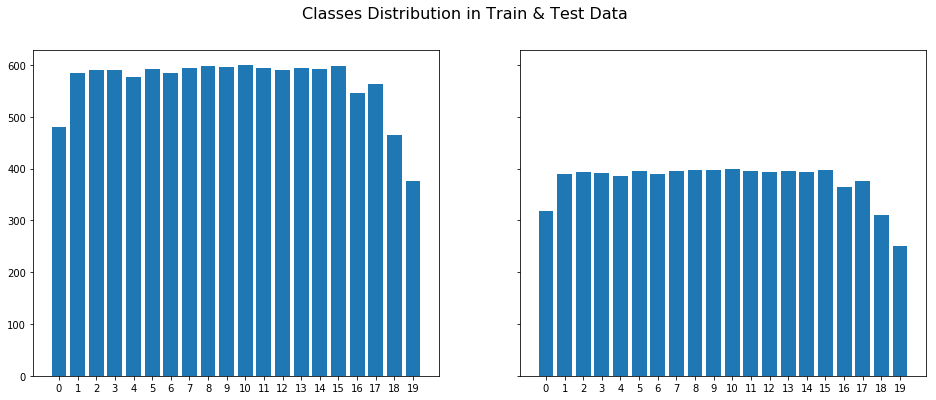

In [2]:
import matplotlib.pyplot as plt
from collections import Counter

%matplotlib inline

train_classes = Counter(y_train)
test_classes = Counter(y_test)

fig, axs = plt.subplots(1, 2, figsize=(16, 6), sharey=True)
axs[0].bar([str(c) for c in train_classes.keys()], train_classes.values())
axs[0].set_label(range(20))
axs[1].bar([str(c) for c in test_classes.keys()], test_classes.values())
fig.suptitle('Classes Distribution in Train & Test Data', fontsize=16)

20个类别分布还是比较均匀的, 先尝试对20个类别的新闻数据进行分类.

# 2. Count Vector _vs_ TFIDF Vector

In [3]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfTransformer

X = X_train + X_test

count_vect = CountVectorizer(max_features=10000).fit_transform(X)
X_train_cv = count_vect[:len(X_train)]
X_test_cv = count_vect[len(X_train):]

tfidf_vect = TfidfTransformer().fit_transform(count_vect)
X_train_tfidf = tfidf_vect[:len(X_train)]
X_test_tfidf = tfidf_vect[:len(X_test)]

In [4]:
len(X_train), X_train_cv.shape, X_test_tfidf.shape

(11314, (11314, 10000), (7532, 10000))

In [5]:
len(y_train), len(y_test)

(11314, 7532)

[Classification of text documents using sparse features](http://scikit-learn.org/stable/auto_examples/text/document_classification_20newsgroups.html#sphx-glr-auto-examples-text-document-classification-20newsgroups-py)

[Sample pipeline for text feature extraction and evaluation](http://scikit-learn.org/stable/auto_examples/model_selection/grid_search_text_feature_extraction.html#sphx-glr-auto-examples-model-selection-grid-search-text-feature-extraction-py)

In [6]:
from models import evaluate_models

L1 penalty
________________________________________________________________________________
Training: 
LinearSVC(C=1.0, class_weight=None, dual=False, fit_intercept=True,
     intercept_scaling=1, loss='squared_hinge', max_iter=1000,
     multi_class='ovr', penalty='l1', random_state=None, tol=0.001,
     verbose=0)
train time: 21.623s
test time:  0.012s
accuracy:   0.695
dimensionality: 10000
density: 0.076700


________________________________________________________________________________
Training: 
SGDClassifier(alpha=0.0001, average=False, class_weight=None, epsilon=0.1,
       eta0=0.0, fit_intercept=True, l1_ratio=0.15,
       learning_rate='optimal', loss='hinge', max_iter=50, n_iter=None,
       n_jobs=1, penalty='l1', power_t=0.5, random_state=None,
       shuffle=True, tol=None, verbose=0, warm_start=False)
train time: 8.165s
test time:  0.013s
accuracy:   0.624
dimensionality: 10000
density: 0.243635


L2 penalty
____________________________________________________________

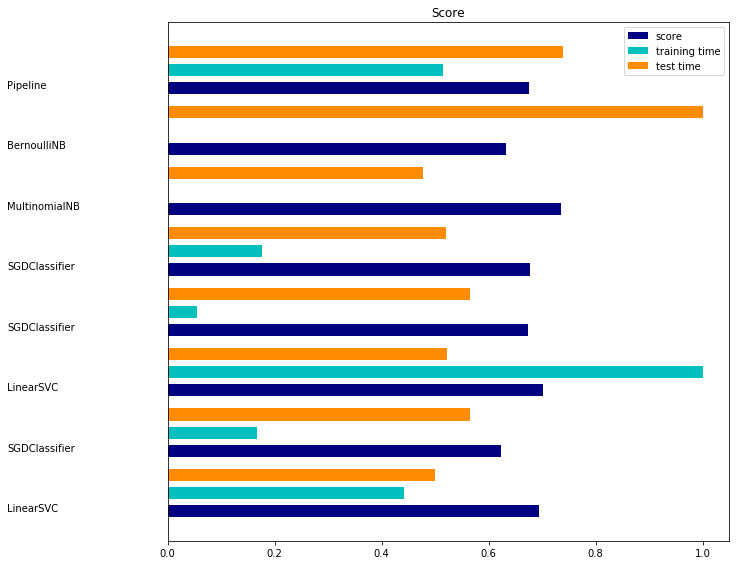

In [7]:
evaluate_models(X_train_cv, y_train, X_test_cv, y_test)